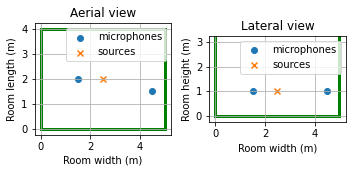

In [4]:
import sys
import numpy as np

sys.path.insert(0, "..")

from pyroomasync import ConnectedShoeBox, simulate
from pyroomasync.utils.visualization import plot_room_2d
from algorithms.sro_estimation import naive_sro_estimator

ROOM_DIMS = [5,4,3]
MIC_COORDINATES = [
    [1.5, 2, 1],
    [4.5, 1.5, 1]
]
SOURCE_COORDINATES = [2.5, 2, 1]
SR = 16000

room = ConnectedShoeBox(ROOM_DIMS, fs=SR)
room.add_microphone(MIC_COORDINATES[0])
room.add_microphone(MIC_COORDINATES[1])
source_signal = np.random.randn(int(SR))
room.add_source(SOURCE_COORDINATES, source_signal)
plot_room_2d(room, mode="row")

In [2]:
def generate_signals(sr_offset=0.5, rt60=None, snr_in_db=100, signal_duration_in_secs=5, sr=16000):
    pad_in_secs = 2
    signal_duration_in_secs = signal_duration_in_secs + pad_in_secs
    
    room = ConnectedShoeBox(ROOM_DIMS, rt60=rt60, fs=sr)

    # Add microphones with their sampling frequencies and latencies
    room.add_microphone(MIC_COORDINATES[0])
    room.add_microphone(MIC_COORDINATES[1], fs_offset=sr_offset)

    # Add a source
    source_signal = np.random.randn(int(signal_duration_in_secs*sr))
    room.add_source(SOURCE_COORDINATES, source_signal)#"data/vctk/p225_002.wav")

    # simulate and get the results recorded in the microphones
    simulation_results = simulate(room, snr=snr_in_db)
    
    # Crop signal beginning
    simulation_results[:, int(sr*pad_in_secs):]
    return simulation_results, sr

def estimate_sro(x0, x1, sr, frame_size_in_secs=0.3, hop_percent=0.5):
    return naive_sro_estimator(x0, x1, sr, frame_size_in_secs, hop_percent)
    

In [3]:
from ipywidgets import FloatSlider, IntSlider, interact_manual

sr_offset_slider = FloatSlider(min=0, max=2, step=0.1, value=0.1)
duration_slider = FloatSlider(min=1, max=100, step=1, value=1)
reverb_slider = FloatSlider(min=0, max=1, step=0.1, value=0.2)

def interactive_simulate(sr_offset, duration, reverb):
    signals, sr = generate_signals(sr_offset=sr_offset,
                                   signal_duration_in_secs=duration,
                                   rt60=reverb,
                                   )
    estimated_sro = estimate_sro(signals[0], signals[1], SR)

interact_manual(interactive_simulate,
                sr_offset=sr_offset_slider,
                duration=duration_slider,
                reverb=reverb_slider)

interactive(children=(FloatSlider(value=0.1, description='sr_offset', max=2.0), FloatSlider(value=1.0, descrip…

<function __main__.interactive_simulate(sr_offset, duration, reverb)>